# COT Reports 

Looking to make a data pipeline using CFTC API of downloading COT reports and feeding it into either CSV files or MySQL. This can be used to make a host dashboards using PowerBI to display the latest information.

In [20]:
# Importing Libraries

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cycler
import numpy as np
import cot_reports as cot


In [25]:
# Dark Mode

from matplotlib import cycler
def plt_dark():
       colors = cycler('color',
                     ['#669FEE', '#66EE91', '#9988DD',
                     '#EECC55', '#88BB44', '#FFBBBB'])
       plt.rc('figure', facecolor='#313233')
       plt.rc('axes', facecolor="#313233", edgecolor='none',
              axisbelow=True, grid=True, prop_cycle=colors,
              labelcolor='gray')
       plt.rc('grid', color='474A4A', linestyle='solid')
       plt.rc('xtick', color='gray')
       plt.rc('ytick', direction='out', color='gray')
       plt.rc('legend', facecolor="#313233", edgecolor="#313233")
       plt.rc("text", color="#C9C9C9")
       plt.rc('figure', facecolor='#313233')
       
plt_dark()

In [26]:

df = cot.cot_year(year = 2024, cot_report_type = 'legacy_fut')


Selected: legacy_fut
Downloaded single year data from: 2024
Stored the file annual.txt in the working directory.


In [27]:
# Cleaning txt file for the information required
filtered_df = df[["Market and Exchange Names", "As of Date in Form YYYY-MM-DD", "Noncommercial Positions-Long (All)", 
                  "Noncommercial Positions-Short (All)", "Change in Noncommercial-Long (All)", "Change in Noncommercial-Short (All)",
                  "% of OI-Noncommercial-Long (All)","% of OI-Noncommercial-Short (All)" ]]

# General Futures data
filtered_df_futures = filtered_df[filtered_df["Market and Exchange Names"].isin(["E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE", "NASDAQ MINI - CHICAGO MERCANTILE EXCHANGE"])]

# Creating Variables for different futures instruments
Es_mini = filtered_df_futures[filtered_df_futures["Market and Exchange Names"]== "E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE"]
Nq_mini = filtered_df_futures[filtered_df_futures["Market and Exchange Names"]== "NASDAQ MINI - CHICAGO MERCANTILE EXCHANGE"]

Es_mini


,Market and Exchange Names,As of Date in Form YYYY-MM-DD,Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),Change in Noncommercial-Long (All),Change in Noncommercial-Short (All),% of OI-Noncommercial-Long (All),% of OI-Noncommercial-Short (All)
2436,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-02-27,298538,522761,26668,32361,12.7,22.3
2437,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-02-20,271870,490400,-20596,-17844,11.7,21.1
2438,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-02-13,292466,508244,13753,-3431,12.5,21.7
2439,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-02-06,278713,511675,-5846,1154,12.1,22.3
2440,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-30,284559,510521,4474,40963,12.3,22.1
2441,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-23,280085,469558,19966,40193,12.3,20.7
2442,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-16,260119,429365,-12128,40069,11.7,19.4
2443,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-09,272247,389296,14926,-82113,12.3,17.6
2444,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-02,257321,471409,6277,27903,11.6,21.2


C:\Users\User\AppData\Local\Temp\ipykernel_2596\1963392429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Es_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Es_mini["As of Date in Form YYYY-MM-DD"])


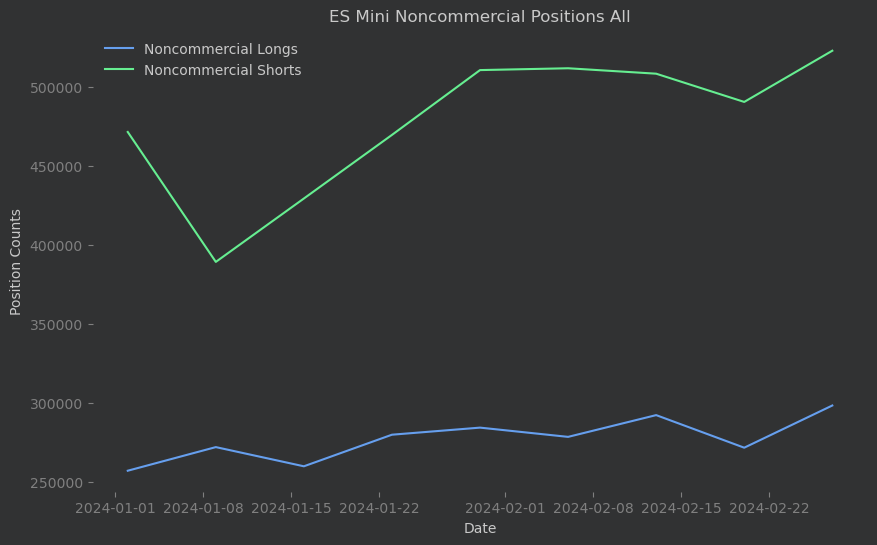

In [35]:
Es_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Es_mini["As of Date in Form YYYY-MM-DD"])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(Es_mini["As of Date in Form YYYY-MM-DD"], Es_mini["Noncommercial Positions-Long (All)"], label="Noncommercial Longs")
plt.plot(Es_mini["As of Date in Form YYYY-MM-DD"], Es_mini["Noncommercial Positions-Short (All)"], label="Noncommercial Shorts")

plt.title('ES Mini Noncommercial Positions All')
plt.xlabel('Date')
plt.ylabel('Position Counts')
plt.legend()
plt.grid(False)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2596\790024039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nq_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Nq_mini["As of Date in Form YYYY-MM-DD"])


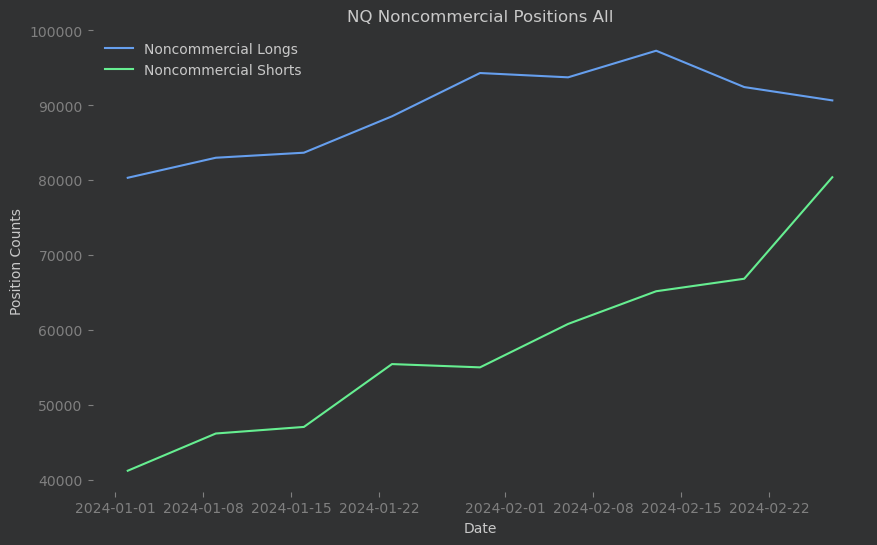

In [36]:
Nq_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Nq_mini["As of Date in Form YYYY-MM-DD"])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(Nq_mini["As of Date in Form YYYY-MM-DD"], Nq_mini["Noncommercial Positions-Long (All)"], label="Noncommercial Longs")
plt.plot(Nq_mini["As of Date in Form YYYY-MM-DD"], Nq_mini["Noncommercial Positions-Short (All)"], label="Noncommercial Shorts")

plt.title('NQ Noncommercial Positions All')
plt.xlabel('Date')
plt.ylabel('Position Counts')
plt.legend()
plt.grid(False)
plt.show()